In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [19]:
# data:  https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data
# refs:
# https://www.kaggle.com/code/jesucristo/fraud-complete-eda#Data
# https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook#Equally-Distributing-and-Correlating:
# https://www.kaggle.com/code/cdeotte/xgb-fraud-with-magic-0-9600
# https://www.kaggle.com/code/cdeotte/rapids-feature-engineering-fraud-0-96

dtypes = {"Time": np.uint32,
          "Class": bool}

data = pd.read_csv("../data/creditcard.csv", dtype=dtypes)

In [20]:
data["isFraud"] = data["Class"]
data.drop("Class", axis=1, inplace=True)
print(data.info(memory_usage="deep"))

display(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     284807 non-null  uint32 
 1   V1       284807 non-null  float64
 2   V2       284807 non-null  float64
 3   V3       284807 non-null  float64
 4   V4       284807 non-null  float64
 5   V5       284807 non-null  float64
 6   V6       284807 non-null  float64
 7   V7       284807 non-null  float64
 8   V8       284807 non-null  float64
 9   V9       284807 non-null  float64
 10  V10      284807 non-null  float64
 11  V11      284807 non-null  float64
 12  V12      284807 non-null  float64
 13  V13      284807 non-null  float64
 14  V14      284807 non-null  float64
 15  V15      284807 non-null  float64
 16  V16      284807 non-null  float64
 17  V17      284807 non-null  float64
 18  V18      284807 non-null  float64
 19  V19      284807 non-null  float64
 20  V20      284807 non-null  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isFraud
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


In [21]:
dulicates = len(data[data.duplicated()])
print(f"{dulicates} duplicates were removed")
data = data.drop_duplicates(keep="first")

1081 duplicates were removed


In [22]:
print("{}% of data missing".format(data.isna().sum().sum() / np.prod(data.shape) * 100))

0.0% of data missing


In [23]:
fraud_percentage = data["isFraud"].value_counts(normalize=True) * 100
print("Not Frauds: {:.2f}% of the dataset".format(fraud_percentage.iloc[0]))
print("Frauds: {:.2f}% of the dataset".format(fraud_percentage.iloc[1]))

Not Frauds: 99.83% of the dataset
Frauds: 0.17% of the dataset


In [24]:
print(data.describe())

                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.6898

C:\Users\david\AppData\Local\Temp\ipykernel_15164\3982954319.py:11: RuntimeWarning: divide by zero encountered in log
  sns.histplot(np.log(amount_values), kde=True, ax=ax[1], color="r")


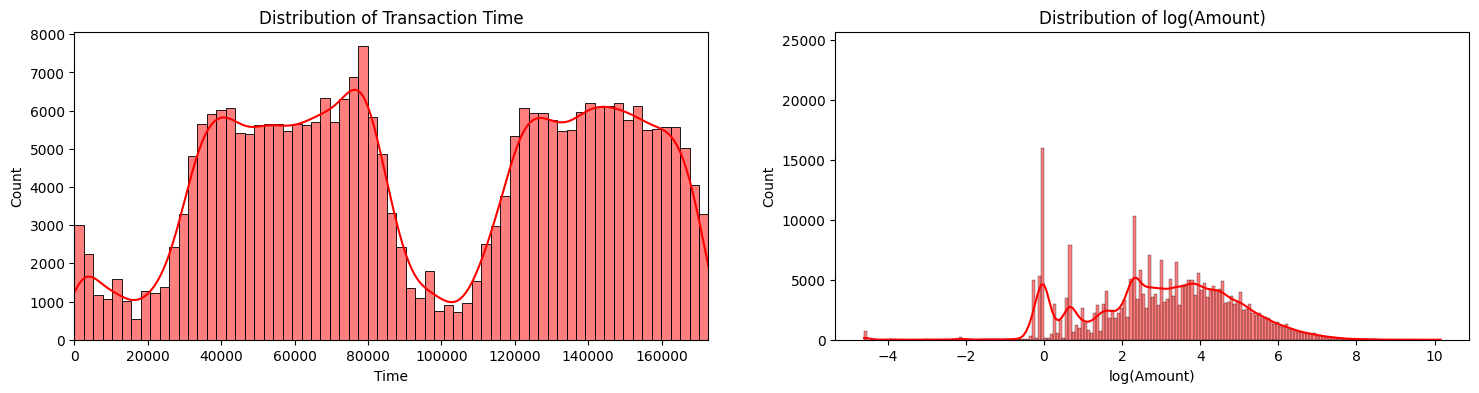

5883

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_values = data["Time"].values
amount_values = data["Amount"].values

sns.histplot(time_values, ax=ax[0], kde=True, color="red")
ax[0].set_title("Distribution of Transaction Time")
ax[0].set_xlabel("Time")
ax[0].set_xlim([min(time_values), max(time_values)])

sns.histplot(np.log(amount_values), kde=True, ax=ax[1], color="r")
ax[1].set_title("Distribution of log(Amount)")
ax[1].set_xlabel("log(Amount)")
ax[1].set_ylim([min(amount_values), max(amount_values)])

plt.show()

del time_values, amount_values
gc.collect()


In [26]:
data["Time_day"] = data["Time"] / (60 * 60 * 24) % 1
data["time_sin"] =  np.sin(2 * np.pi * data["Time_day"])
data["time_cos"] =  np.cos(2 * np.pi * data["Time_day"])

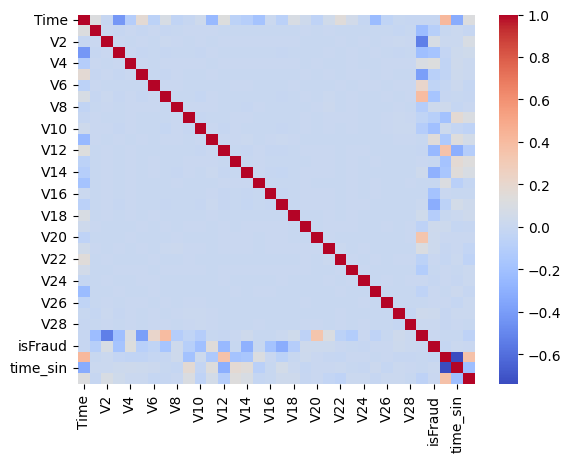

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'isFraud', 'Time_day', 'time_sin', 'time_cos'],
      dtype='object')
Series([], dtype: int64)


In [27]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm')
plt.show()

print(data.columns)
high_corr = (corr.abs() > 0.90).sum()
print(high_corr[high_corr > 1])

In [28]:
v_features = [f"V{i}" for i in range(1, 29)]
for v in v_features:
    data[f"V15*{v}"] = data["V15"] * data[v]

In [29]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'isFraud', 'Time_day', 'time_sin', 'time_cos', 'V15*V1', 'V15*V2',
       'V15*V3', 'V15*V4', 'V15*V5', 'V15*V6', 'V15*V7', 'V15*V8', 'V15*V9',
       'V15*V10', 'V15*V11', 'V15*V12', 'V15*V13', 'V15*V14', 'V15*V15',
       'V15*V16', 'V15*V17', 'V15*V18', 'V15*V19', 'V15*V20', 'V15*V21',
       'V15*V22', 'V15*V23', 'V15*V24', 'V15*V25', 'V15*V26', 'V15*V27',
       'V15*V28'],
      dtype='object')

In [30]:
from sklearn.utils import resample

fraud = data[data['isFraud'] == 1]
nonfraud = data[data['isFraud'] == 0]

nonfraud_downsampled = resample(
    nonfraud,
    replace=False,
    n_samples=len(fraud),
    random_state=11
)

data_downsampled = pd.concat([fraud, nonfraud_downsampled])
target_corr = data_downsampled.corr()["isFraud"]
print(np.array(target_corr.values))
high_corr = (target_corr.abs() > 0.90).sum()
print(high_corr[high_corr > 1])

[-0.11435362 -0.40929484  0.47799832 -0.56253249  0.70497684 -0.35449385
 -0.41934762 -0.46899623  0.10848585 -0.55490032 -0.62496601  0.67127461
 -0.67305294 -0.08278736 -0.74621157 -0.02930818 -0.5872392  -0.54843318
 -0.4603094   0.24863006  0.18549713  0.12880255  0.05195449 -0.04151748
 -0.0871065   0.00687404  0.06837129  0.13021699  0.0859445   0.06523872
  1.         -0.14805066  0.09799449  0.06223893  0.08017093 -0.10971162
  0.09896024 -0.10051592  0.05866745 -0.02883568  0.09161977  0.08599289
  0.08710121  0.08282424 -0.08341152  0.07272106 -0.05317149  0.03062543
  0.10237178  0.01987399  0.04563495  0.03531669  0.21548435 -0.06007661
  0.0836159  -0.06293171 -0.05502792  0.01195602 -0.026793    0.06279714
  0.08238301  0.02752628]
[]


c:\Users\david\miniconda3\envs\dl\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


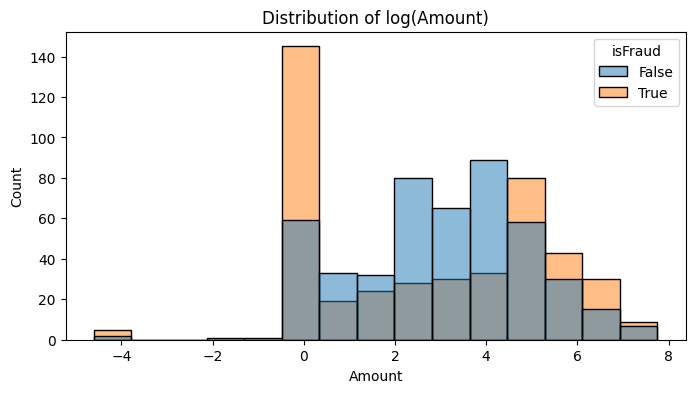

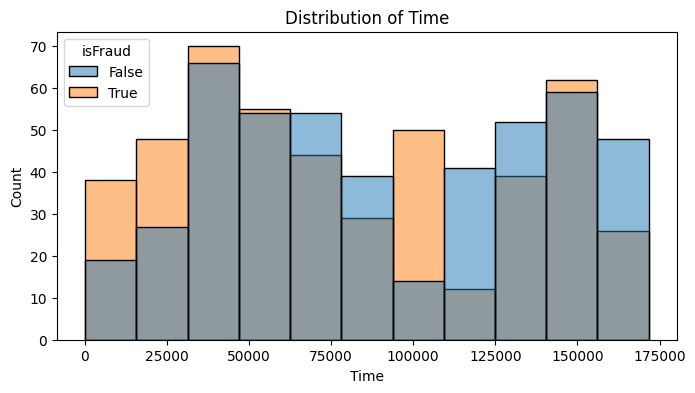

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(data=data_downsampled, x=np.log(data_downsampled["Amount"]), color="red", hue="isFraud")
plt.title("Distribution of log(Amount)")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data=data_downsampled, x=data_downsampled["Time"], color="red", hue="isFraud")
plt.title("Distribution of Time")
plt.show()

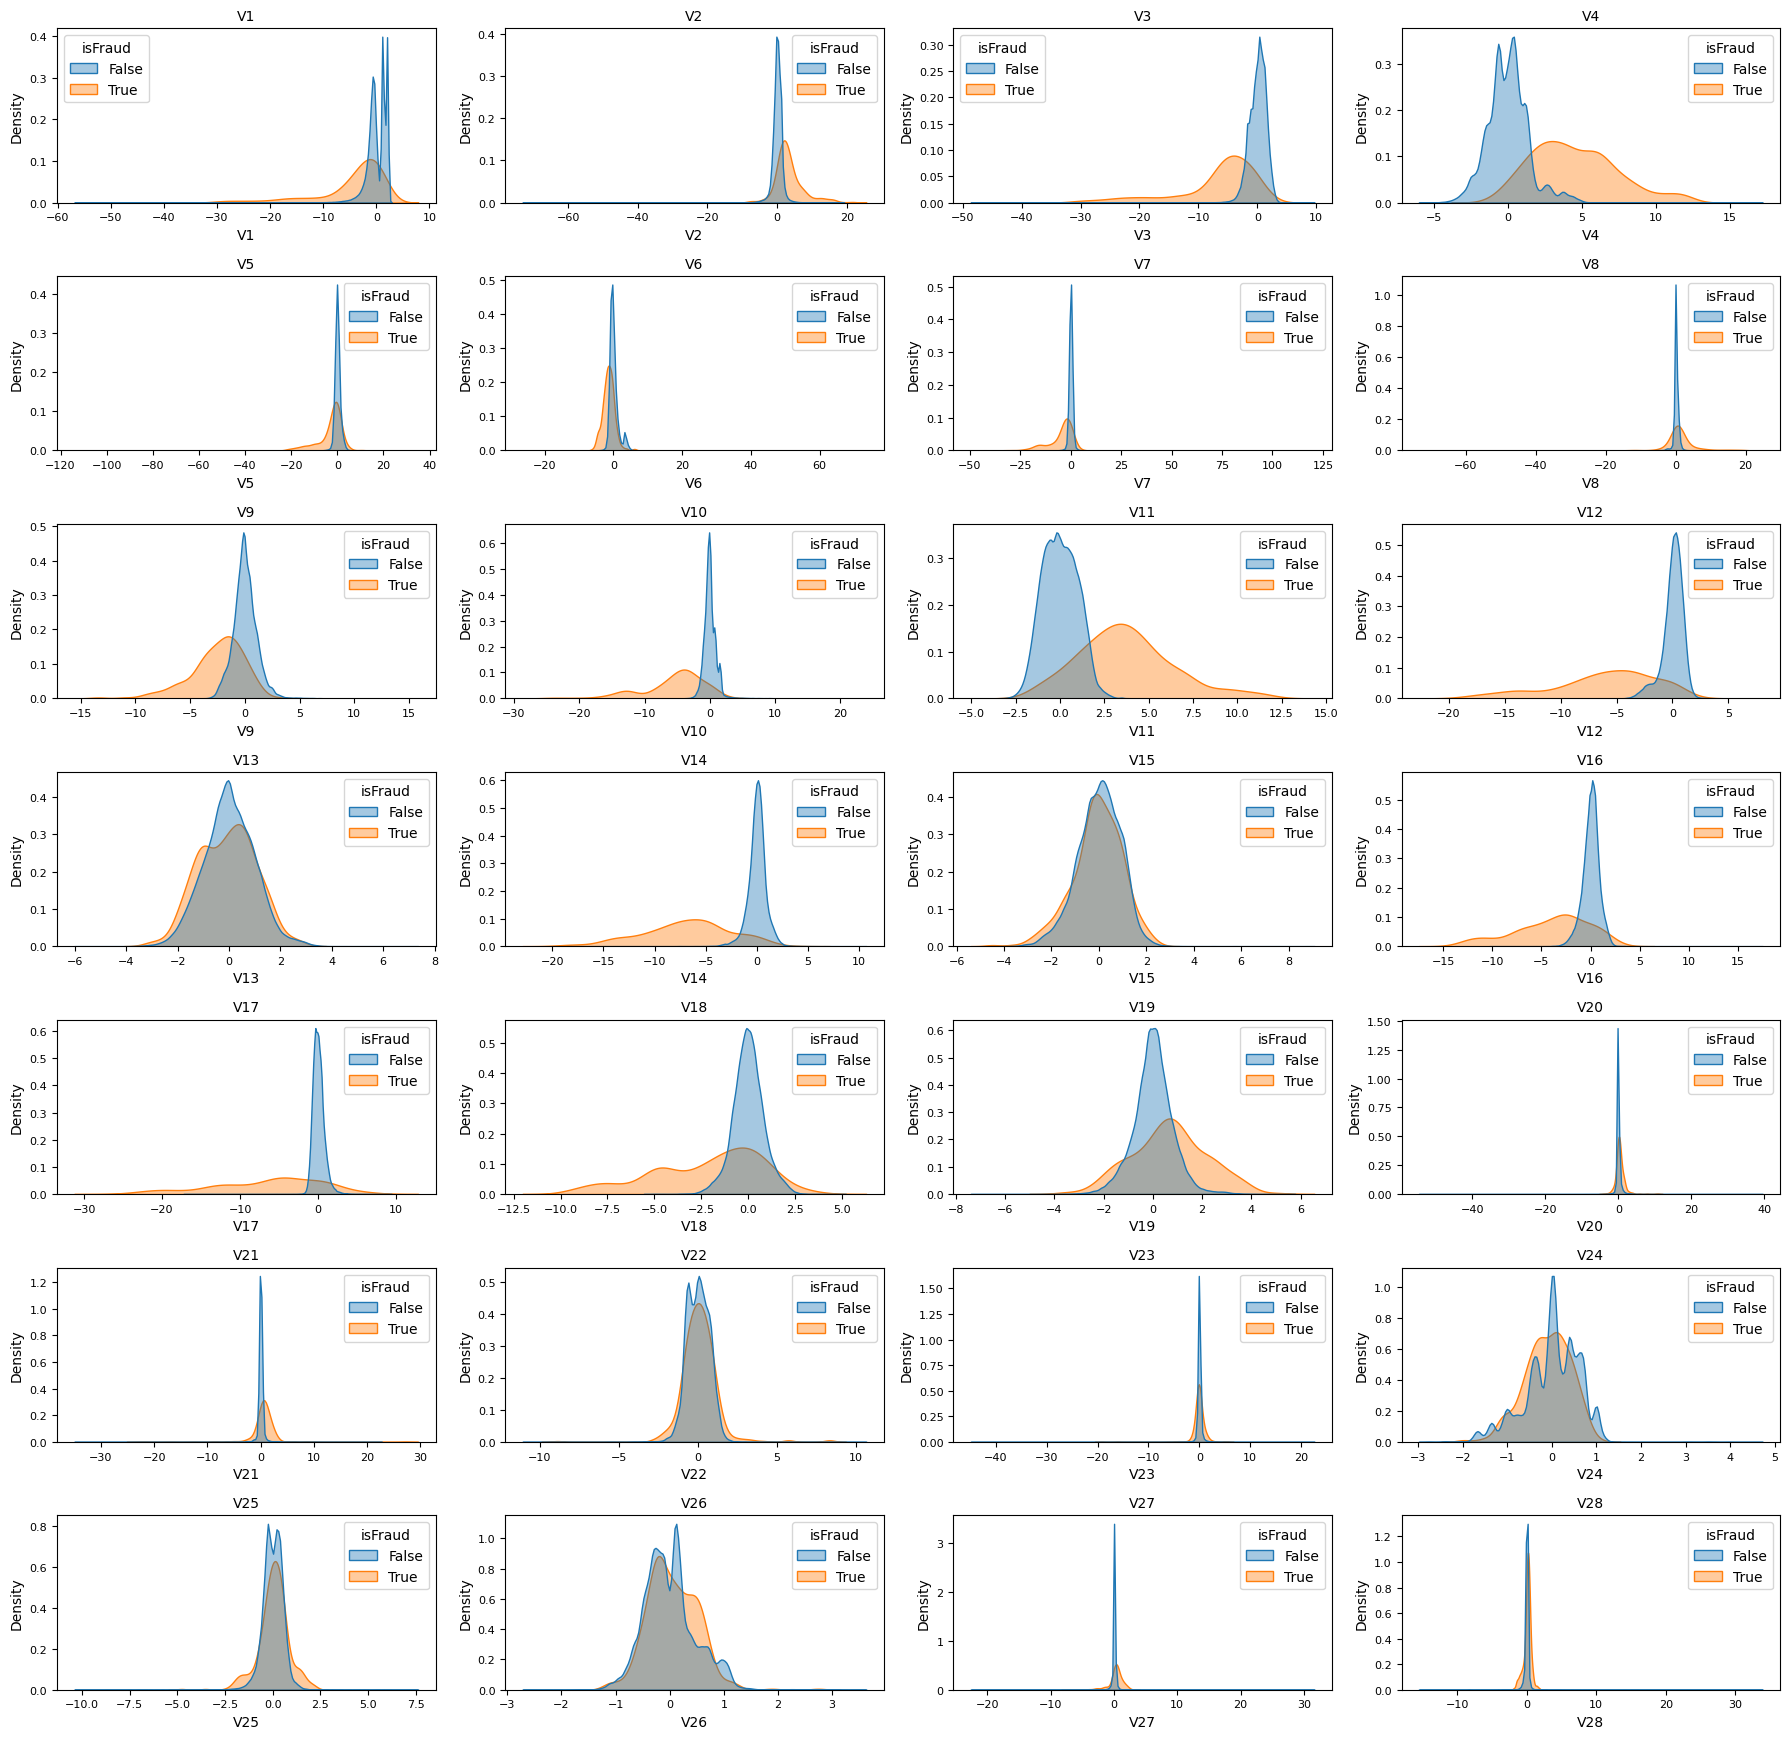

In [32]:
v_features = [f"V{i}" for i in range(1, 29)]
n_cols = 4
n_rows = (len(v_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 2.5))
axes = axes.flatten()

for i, col in enumerate(v_features):
    ax = axes[i]
    sns.kdeplot(
        data=data,
        x=col,
        hue='isFraud',
        common_norm=False,
        fill=True,
        alpha=0.4,
        ax=ax,
        linewidth=1
    )
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)


plt.tight_layout()
plt.show()


In [33]:
%%time
from sklearn.model_selection import train_test_split, StratifiedKFold

X = data.drop(["isFraud"], axis=1)
y = data["isFraud"]

train_size = int(0.8 * len(data))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

train_fraud_percentage = y_train.value_counts(normalize=True) * 100
test_fraud_percentage = y_test.value_counts(normalize=True) * 100

print("Not Frauds: {:.2f}% of the train set".format(train_fraud_percentage.iloc[0]))
print("Frauds: {:.2f}% of the train set".format(train_fraud_percentage.iloc[1]),'\n')

print("Not Frauds: {:.2f}% of the test set".format(test_fraud_percentage.iloc[0]))
print("Frauds: {:.2f}% of the test set".format(test_fraud_percentage.iloc[1]), '\n')



scv = StratifiedKFold(n_splits=4, shuffle=True, random_state=11)

for fold, (train_idx, val_idx) in enumerate(scv.split(X_train, y_train)):
    X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

    _, train_count = np.unique(y_tr, return_counts=True)
    _, valid_count = np.unique(y_val, return_counts=True)
    print(f"fold {fold+1} -", f"train: {train_count / sum(train_count)}", f"valid: {valid_count / sum(valid_count)}")

del train_fraud_percentage, test_fraud_percentage
h = gc.collect()



Not Frauds: 99.82% of the train set
Frauds: 0.18% of the train set 

Not Frauds: 99.87% of the test set
Frauds: 0.13% of the test set 

fold 1 - train: [0.99823773 0.00176227] valid: [0.99825535 0.00174465]
fold 2 - train: [0.9982436 0.0017564] valid: [0.99823773 0.00176227]
fold 3 - train: [0.9982436 0.0017564] valid: [0.99823773 0.00176227]
fold 4 - train: [0.9982436 0.0017564] valid: [0.99823773 0.00176227]
CPU times: total: 500 ms
Wall time: 505 ms


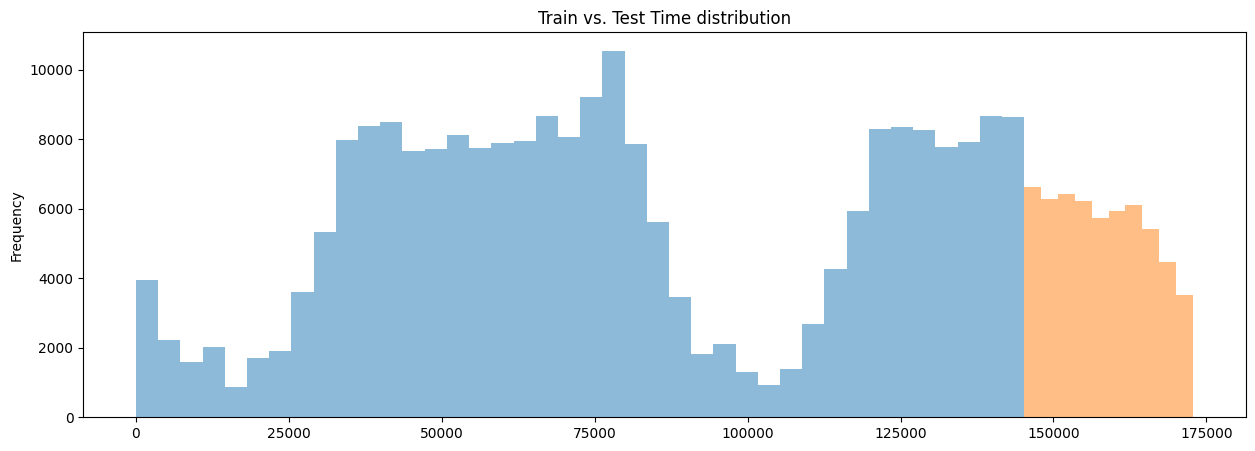

In [34]:
# fig, ax = plt.subplots(1, 2, figsize=(18,4))


# sns.histplot(X_train["Time"], ax=ax[0], kde=True, color="red")
# ax[0].set_title("Distribution of Transaction Time")
# ax[0].set_xlabel("Time")


# sns.histplot(X_test["Time"], kde=True, ax=ax[1], color="r")
# ax[1].set_title("Distribution of log(Amount)")
# ax[1].set_xlabel("log(Amount)")

X_train["Time"].plot(kind="hist",
                     figsize=(15, 5),
                     label="train",
                     bins=40,
                     alpha=0.5,
                     title="Train vs. Test Time distribution")
X_test["Time"].plot(kind="hist",
                     figsize=(15, 5),
                     label="test",
                     alpha=0.5)

plt.show()

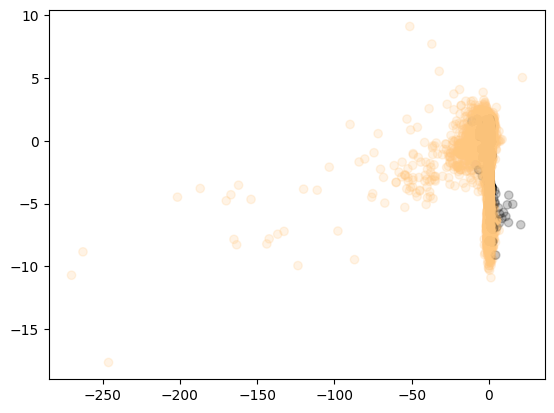

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=2)
PCA_train_x = pca.fit_transform(X_train_scaled)

plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1], c=y_train, cmap="copper_r", alpha=0.2)
plt.show()


In [ ]:
%%time

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, recall_score, accuracy_score
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


other_features = X.drop(["Time", "Amount"], axis=1).columns.to_list()

# model = XGBClassifier(
#     objective='binary:logistic',
#     eval_metric='aucpr',
#     use_label_encoder=False,
#     random_state=11,
#     n_jobs=-1,
# )

model = BalancedRandomForestClassifier(
    random_state=11,
    n_jobs=-1,
)

preprocessor = ColumnTransformer([
    ("time_preprocess", RobustScaler(), ["Time"]),
    ("amount_preprocess", StandardScaler(), ["Amount"]),
    ('pass', 'passthrough', other_features)
    ]
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    # ("smote", SMOTE(random_state=11)),
    ("clf", model)
])

# param_dist = {
#     'clf__n_estimators': [100, 300, 500, 800, 1000],
#     'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'clf__max_depth': [3, 5, 7, 9, 11],
#     'clf__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'clf__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'clf__gamma': [0, 0.1, 0.3, 0.5, 1],
#     'clf__min_child_weight': [1, 3, 5, 7, 10],
#     'clf__reg_alpha': [0, 0.01, 0.1, 1, 10],
#     'clf__reg_lambda': [0.1, 1, 5, 10, 20]
# }

param_dist = {
    'clf__n_estimators': [100, 300, 500, 800, 1000],
    'clf__max_depth': [3, 5, 7, 9, 11, None],  # None allows nodes to expand until all leaves are pure
    'clf__min_samples_split': [2, 5, 10, 20],
    'clf__min_samples_leaf': [1, 2, 4, 8],
    'clf__max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'clf__bootstrap': [True, False],
    'clf__class_weight': ['balanced', 'balanced_subsample', None],
    'clf__max_samples': [0.6, 0.7, 0.8, 0.9, 1.0]  # Proportion of samples to draw for each tree
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, pos_label=1)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=scv,
    scoring=scoring,
    refit='recall',
    verbose=2,
    n_jobs=-1,
    random_state=11
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best CV Recall:", search.cv_results_['mean_test_recall'][search.best_index_])
print("Best CV Accuracy:", search.cv_results_['mean_test_accuracy'][search.best_index_])

Fitting 4 folds for each of 20 candidates, totalling 80 fits


c:\Users\david\miniconda3\envs\dl\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
c:\Users\david\miniconda3\envs\dl\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:02] WARNING: D:\bld\xgboost-split_1758007502304\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'clf__subsample': 1.0, 'clf__reg_lambda': 0.1, 'clf__reg_alpha': 0, 'clf__n_estimators': 1000, 'clf__min_child_weight': 3, 'clf__max_depth': 3, 'clf__learning_rate': 0.01, 'clf__gamma': 0.3, 'clf__colsample_bytree': 1.0}
Best CV Recall: 0.877020202020202
Best CV Accuracy: 0.9920962199312715
CPU times: total: 3min 24s
Wall time: 6min 40s


In [45]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report

best_model = search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold (by F1): {best_threshold:.3f}")
print(f"Precision: {precisions[best_idx]:.3f}, Recall: {recalls[best_idx]:.3f}")

y_pred_opt = (y_pred_prob >= best_threshold).astype(int)
print(confusion_matrix(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt, digits=3))

Best threshold (by F1): 0.976
Precision: 0.962, Recall: 0.689
[[56670     2]
 [   23    51]]
              precision    recall  f1-score   support

       False      1.000     1.000     1.000     56672
        True      0.962     0.689     0.803        74

    accuracy                          1.000     56746
   macro avg      0.981     0.845     0.901     56746
weighted avg      1.000     1.000     1.000     56746



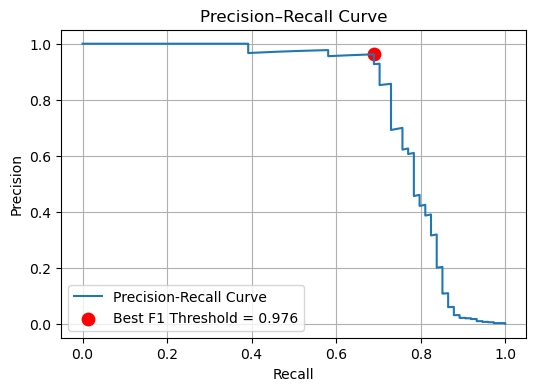

In [50]:
plt.figure(figsize=(6,4))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.scatter(recalls[best_idx], precisions[best_idx], color='red', s=80,
            label=f'Best F1 Threshold = {best_threshold:.3f}')
plt.title('Precision–Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
target_recall = 0.7
idx = np.argmin(np.abs(recalls - target_recall))
target_threshold = thresholds[idx]
target_precision = precisions[idx]

print(f"Threshold for recall ~{target_recall}:", target_threshold)
print("Precision at this threshold:", round(target_precision, 2))
print("Actual recall at this threshold:", round(recalls[idx], 2))

Threshold for recall ~0.7: 0.956054
Precision at this threshold: 0.85
Actual recall at this threshold: 0.7


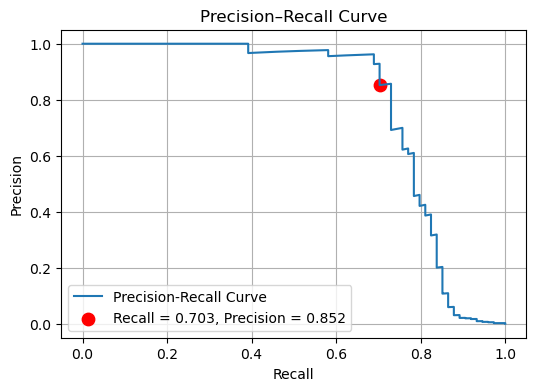

In [69]:
plt.figure(figsize=(6,4))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.scatter(recalls[idx], precisions[idx], color='red', s=80,
            label=f'Recall = {recalls[idx]:.3f}, Precision = {precisions[idx]:.3f}')
plt.title('Precision–Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

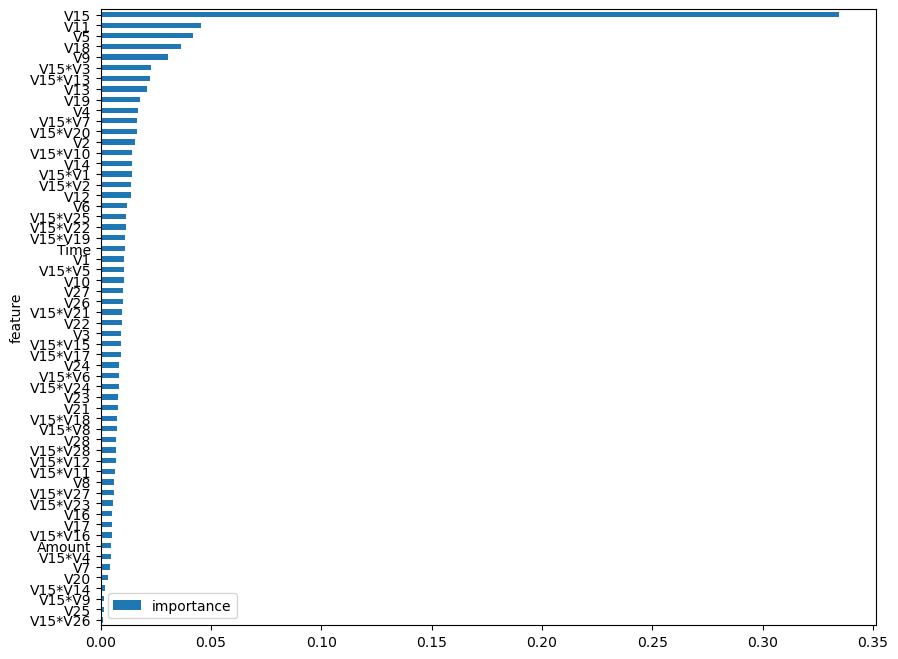

In [59]:
xgb_model = search.best_estimator_.named_steps['clf']

features = X_train.columns
importances = xgb_model.feature_importances_

fi_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

fi_df.plot(kind="barh", x="feature", y="importance", figsize=(10,8))
plt.gca().invert_yaxis()
plt.show()